# Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Loading Model

In [2]:
model = tf.keras.models.load_model("trained_model.keras")

c:\Users\DELL\Documents\my progamming folder\Projects\AI-Crop-Disease-Detection\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Visualizing single image of test set

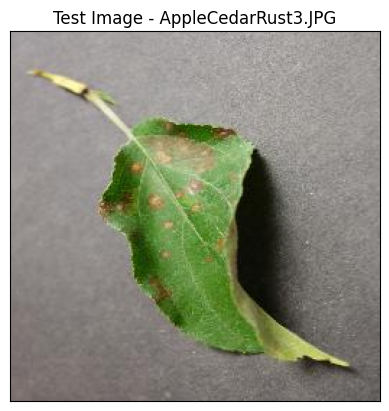

In [15]:
# load image
image_path = "dataset/test/test/AppleCedarRust3.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to RGB format

# display image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f'Test Image - {image_path.split('/')[-1]}')
plt.show()

# Testing Model

In [16]:
# image to PIL format
image = tf.keras.utils.load_img(image_path, target_size=(128, 128))
# PIL Image to array
img_array = tf.keras.utils.img_to_array(image)
img_array = np.array([img_array]) # to covert single image to a batch
img_array.shape

(1, 128, 128, 3)

## prediction

In [17]:
prediction = model.predict(img_array)
prediction.shape, prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


((1, 38),
 array([[2.4214180e-06, 2.6984790e-05, 9.8665524e-01, 2.4617214e-07,
         4.8173584e-05, 6.9385562e-05, 1.4125037e-05, 1.8868133e-04,
         5.9827478e-08, 2.9072080e-05, 8.2413889e-09, 2.4905414e-06,
         1.2548075e-05, 3.3295382e-08, 1.4482531e-08, 4.4288404e-06,
         1.0817903e-02, 8.3168834e-06, 1.4245971e-04, 8.1685530e-06,
         2.3827183e-06, 1.5851714e-07, 1.0987613e-06, 4.6262271e-06,
         1.5655701e-07, 2.1995787e-08, 7.9060439e-04, 7.8069341e-08,
         6.8307144e-04, 3.3985852e-05, 4.0260438e-04, 5.3429962e-06,
         2.0894910e-05, 1.2481347e-07, 1.8769111e-05, 3.8137267e-07,
         2.8688764e-06, 1.9666118e-06]], dtype=float32))

In [18]:
result_index = np.argmax(prediction)
result_index

2

### matching to class name

In [19]:
class_names = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

### Displaying Result of Disease Prediction

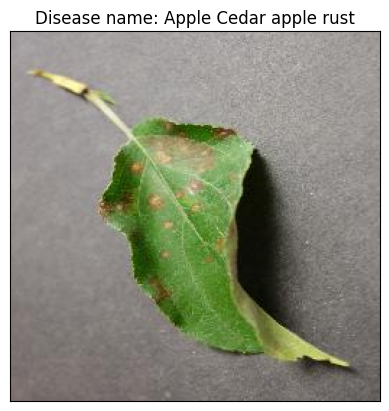

In [20]:
model_prediction = class_names[result_index]
disease_name_split = model_prediction.split('_')
disease_name_list = []
for i in disease_name_split:
    if i != "" and i not in disease_name_list:
        disease_name_list.append(i)
disease_name = " ".join(disease_name_list)
# display image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f'Disease name: {disease_name}')
plt.show()